In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

In [59]:
df = pd.read_csv('hw_aa.csv', sep =';', index_col = 0)
df = df.rename(columns = {'experimentVariant':'var'})

In [60]:
df.head()

,uid,var,version,purchase
1,c4ca4238a0b923820dcc509a6f75849b,1,v2.8.0,0
2,c81e728d9d4c2f636f067f89cc14862c,0,v2.9.0,0
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,1,v2.9.0,0
4,a87ff679a2f3e71d9181a67b7542122c,1,v2.8.0,0
5,e4da3b7fbbce2345d7772b0674a318d5,1,v2.8.0,0


In [62]:
df.version.unique()

array(['v2.8.0', 'v2.9.0', 'v3.7.4.0', 'v3.8.0.0'], dtype=object)

In [63]:
df1 = df.groupby(['version', 'var'], as_index = False).agg({'purchase': 'mean'})
df1

,version,var,purchase
0,v2.8.0,0,0.000993
1,v2.8.0,1,0.045606
2,v2.9.0,0,0.074658
3,v2.9.0,1,0.071304
4,v3.7.4.0,0,0.059943
5,v3.7.4.0,1,0.063018
6,v3.8.0.0,0,0.057604
7,v3.8.0.0,1,0.062848


  0%|          | 0/1000 [00:00<?, ?it/s]

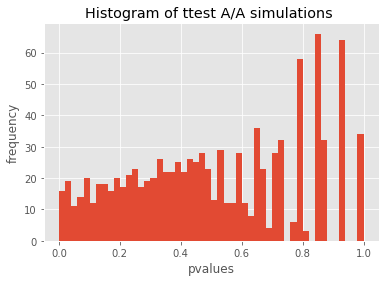

0.039

In [64]:
n = 100000
simulations = 1000
n_s = 1000
res = []

for i in tqdm(range(simulations)):
    s1 = df.query('var == 0 & version != "v2.8.0"').purchase.sample(n_s, replace = False).values
    s2 = df.query('var == 1 & version != "v2.8.0"').purchase.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) 

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

sum(np.array(res) <0.05) / simulations

In [66]:
stats.ttest_ind(s1, s2, equal_var = False)

-0.08730705100159034